<a href="https://colab.research.google.com/github/abhinavbammidi1401/Tests/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')

In [5]:
df.shape

(5728, 2)

In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
print(df['spam'].sum())
print(df.isnull().sum())
print(df.dtypes)

1368
text    0
spam    0
dtype: int64
text    object
spam     int64
dtype: object


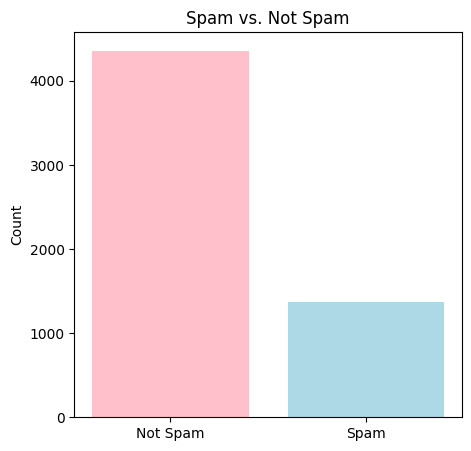

In [22]:
spam_count=df['spam'].value_counts()

#bar chart
plt.figure(figsize=(5,5))
plt.bar(spam_count.index, spam_count.values, color=['pink','lightblue'])
plt.xticks(spam_count.index, ['Not Spam','Spam'])
plt.ylabel('Count')
plt.title('Spam vs. Not Spam')
plt.show()

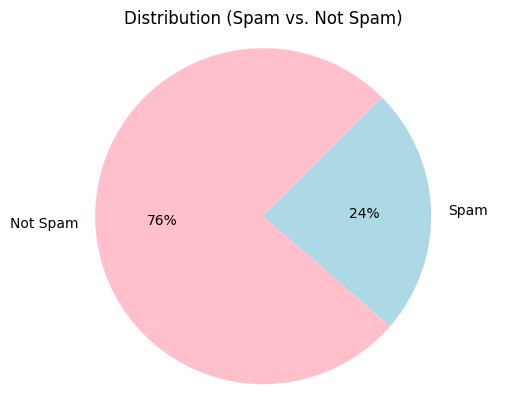

In [24]:
labels=['Not Spam', 'Spam']
colors = ['pink', 'lightblue']

plt.pie(spam_count, labels=labels, colors=colors, autopct='%1.f%%', startangle=45)
plt.axis('equal')
plt.title('Distribution (Spam vs. Not Spam)')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=33)

# Vectorize the text data using TF-IDF
tfidf_vector = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_train = tfidf_vector.fit_transform(X_train)
X_tfidf_test = tfidf_vector.transform(X_test)

In [44]:
# Initialize and train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_tfidf_train, y_train)
mnb_preds = mnb.predict(X_tfidf_test)

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, mnb_preds))
print("Classification Report:\n", classification_report(y_test, mnb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_preds))


Multinomial Naive Bayes:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]


In [46]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Initialize and train the Multinomial Naive Bayes classifier with Laplace smoothing
mnb_with_smoothing = MultinomialNB(alpha=1.0)  # The alpha parameter controls the amount of smoothing (1.0 for Laplace)
mnb_with_smoothing.fit(X_tfidf_train, y_train)
mnb_with_smoothing_predictions = mnb_with_smoothing.predict(X_tfidf_test)

In [47]:
# Evaluate the models with smoothing
print("Multinomial Naive Bayes with Laplace Smoothing:")
print("Accuracy:", accuracy_score(y_test, mnb_with_smoothing_predictions))
print("Classification Report:\n", classification_report(y_test, mnb_with_smoothing_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_with_smoothing_predictions))

Multinomial Naive Bayes with Laplace Smoothing:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]


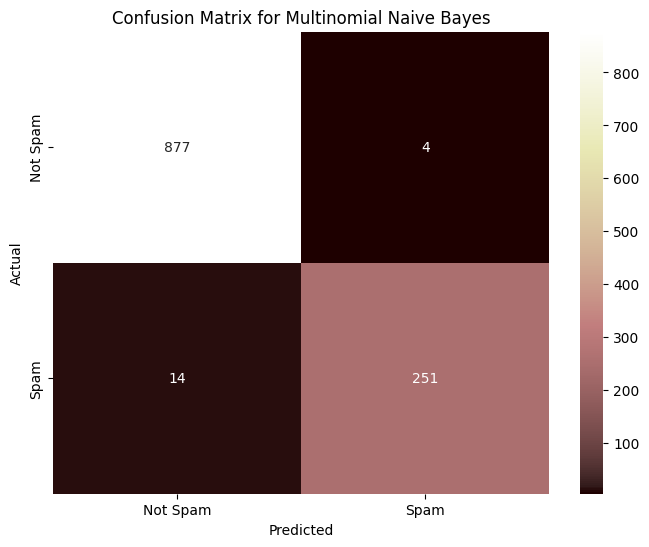

In [52]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for Multinomial Naive Bayes predictions
conf_matrix = confusion_matrix(y_test, mnb_with_smoothing_predictions)

# Define class labels
class_labels = ["Not Spam", "Spam"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

Multinomial Naive Bayes - ROC AUC: 1.00
Threshold for Minimizing FPR: 0.2214


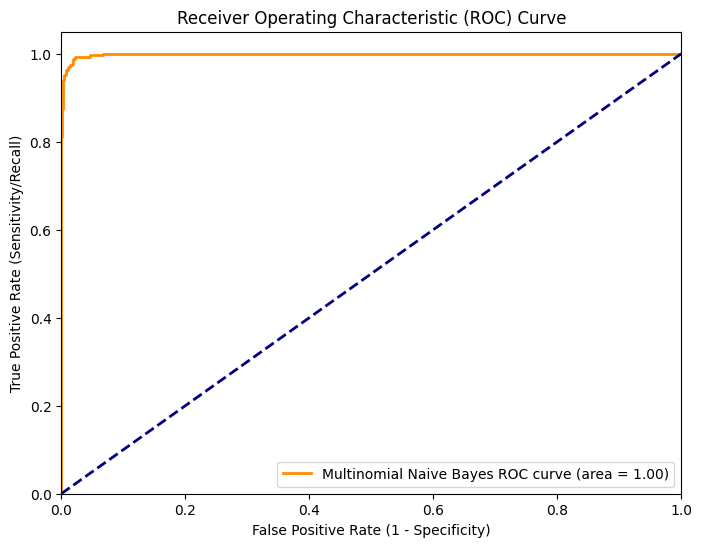

In [53]:
from sklearn.metrics import roc_curve, auc

# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Compute ROC curve and ROC area (AUC) for Multinomial Naive Bayes
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(true_labels, mnb_prob_predictions)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Calculate the Youden's J statistic for each threshold
youden_j = tpr_mnb - fpr_mnb
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds_mnb[optimal_threshold_index]

# Create the ROC curve plot for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, color='darkorange', lw=2, label='Multinomial Naive Bayes ROC curve (area = {:.2f})'.format(roc_auc_mnb))

# Show the ROC curve plot for Multinomial Naive Bayes
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Print ROC AUC value for Multinomial Naive Bayes
print('Multinomial Naive Bayes - ROC AUC: {:.2f}'.format(roc_auc_mnb))

# Print threshold that maximizes Youden's J statistic for Multinomial Naive Bayes
print('Threshold for Minimizing FPR: {:.4f}'.format(optimal_threshold))
plt.show()

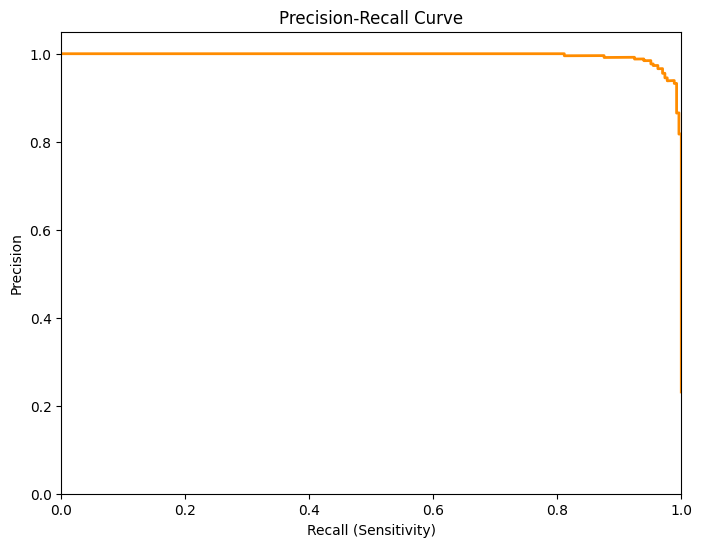

In [54]:
from sklearn.metrics import precision_recall_curve

# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Calculate precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, mnb_prob_predictions)

# Create the precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

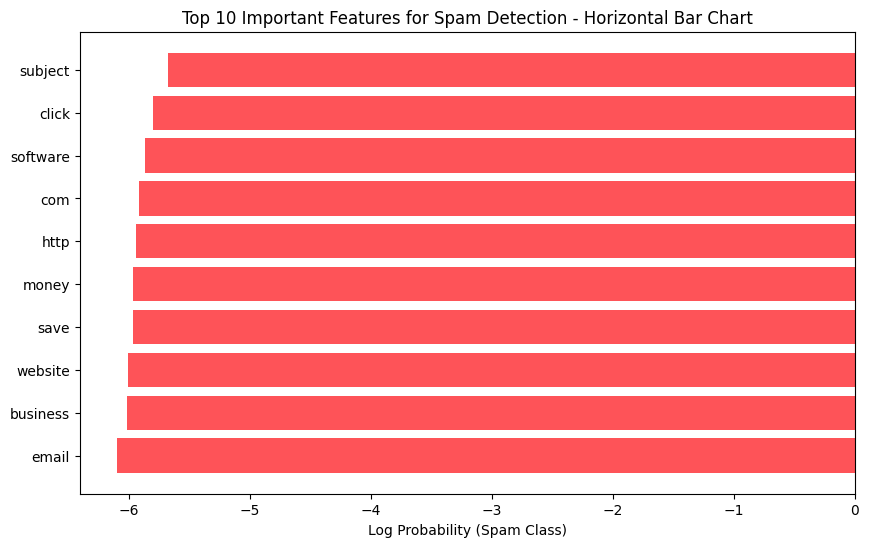

In [56]:

import matplotlib.pyplot as plt
import numpy as np

mnb_model = mnb_with_smoothing

# Get the log probabilities for the spam class (class 1)
log_probabilities_spam = mnb_model.feature_log_prob_[1]

# Get the feature names from your TF-IDF vectorizer's vocabulary
feature_names = np.array(tfidf_vector.get_feature_names_out())

# Sort the features based on log probabilities in descending order
sorted_indices = np.argsort(log_probabilities_spam)[::-1]  # Descending order indices
sorted_features = feature_names[sorted_indices]

# Select the top N features
top_n = 10  # Replace N with the desired number of top features
top_features = sorted_features[:top_n]
top_log_probabilities = log_probabilities_spam[sorted_indices][:top_n]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_log_probabilities, color='#FE5358')
plt.xlabel('Log Probability (Spam Class)')
plt.title('Top {} Important Features for Spam Detection - Horizontal Bar Chart'.format(top_n))
plt.gca().invert_yaxis()  # Inverting y-axis to display the most important feature at the top
plt.show()

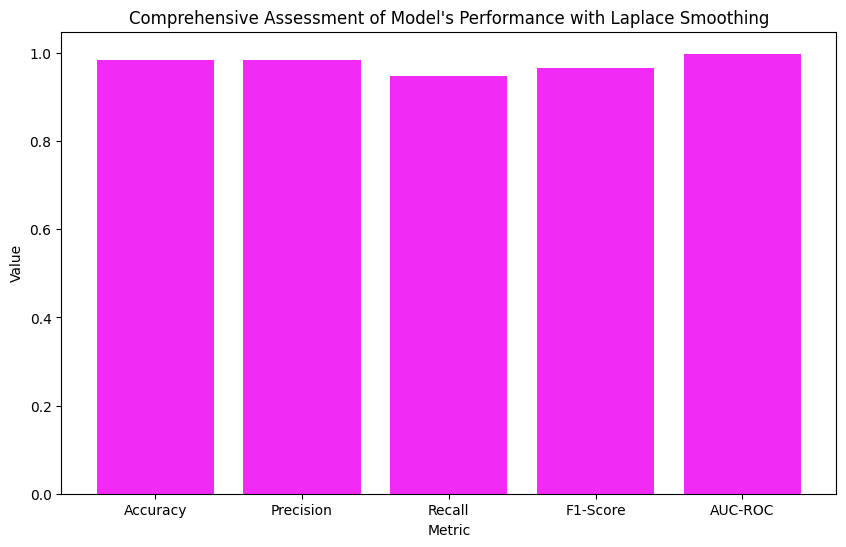

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, mnb_with_smoothing_predictions)
precision = precision_score(y_test, mnb_with_smoothing_predictions)
recall = recall_score(y_test, mnb_with_smoothing_predictions)
f1 = f1_score(y_test, mnb_with_smoothing_predictions)
roc_auc = roc_auc_score(y_test, mnb_prob_predictions)

metrics_dict = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": roc_auc,
}

# Extract metric names and values
metric_names = list(metrics_dict.keys())
metric_values = list(metrics_dict.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color='#F22AF5')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comprehensive Assessment of Model\'s Performance with Laplace Smoothing')
plt.show()

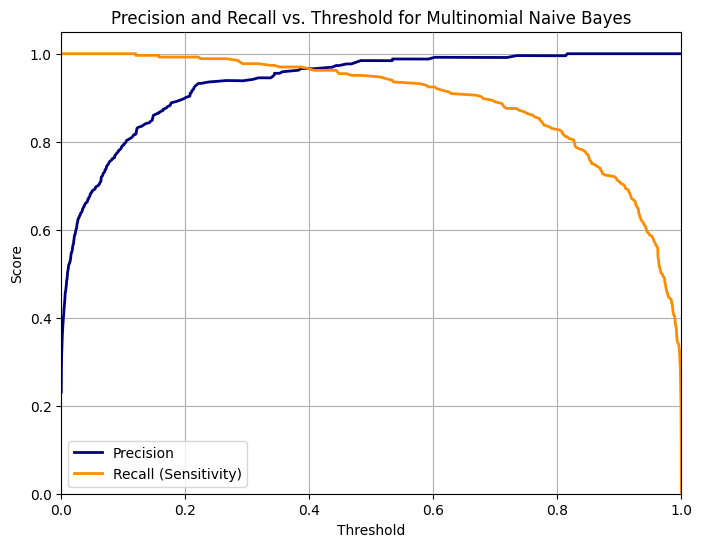

In [59]:
from sklearn.metrics import precision_recall_curve

fpr_mnb, tpr_mnb, thresholds_mnb

# Calculate precision at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, mnb_prob_predictions)

# Create a line graph to show precision vs. recall at different thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='navy', lw=2)
plt.plot(thresholds, recall[:-1], label='Recall (Sensitivity)', color='darkorange', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold for Multinomial Naive Bayes')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.grid()
plt.show()

In [ ]:
#Laplace smoothing on Multinomial Naive Bayes model
#with an alpha value of 1.0 gives an accuracy of 98.43